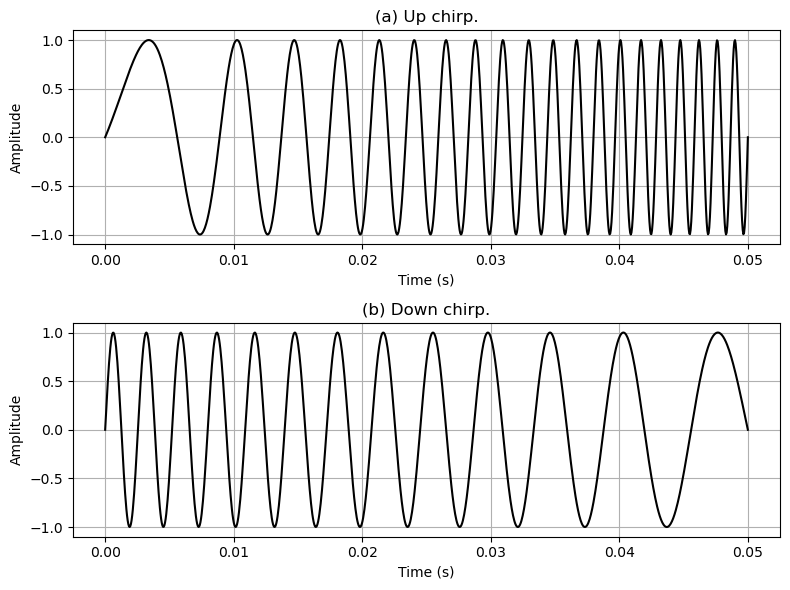

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters with a longer time range
t = np.linspace(0, 0.05, 1000)  # Time vector

# Up chirp
f0_up = 50  # Start frequency
f1_up = 400  # End frequency
up_chirp = np.sin(2 * np.pi * (f0_up + (f1_up - f0_up) * t / 0.05) * t)

# Down chirp
f0_down = 400  # Start frequency
f1_down = 50  # End frequency
down_chirp = np.sin(2 * np.pi * (f0_down - (f0_down - 250) * t / 0.05) * t)

# Plotting with vertical layout
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].plot(t, up_chirp, color='black')
axs[0].set_title('(a) Up chirp.')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)

axs[1].plot(t, down_chirp, color='black')
axs[1].set_title('(b) Down chirp.')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].grid(True)

plt.tight_layout()
plt.show()


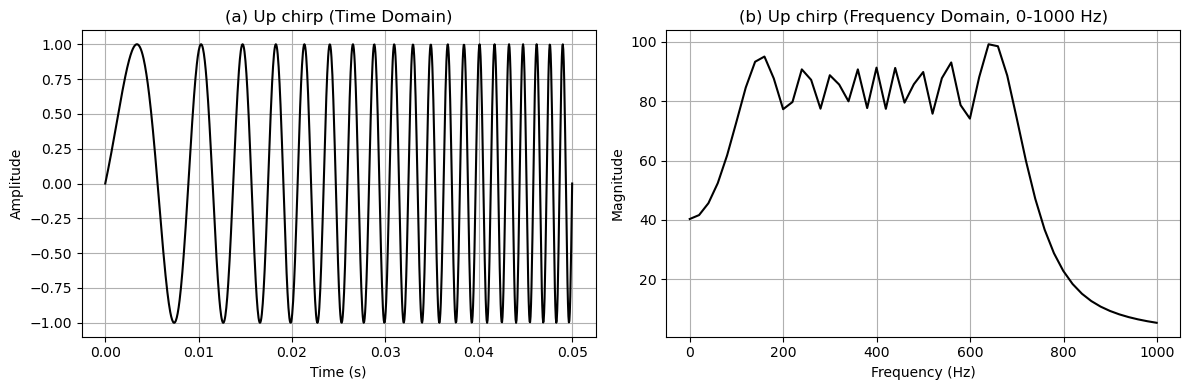

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters with a longer time range
t = np.linspace(0, 0.05, 1000)  # Time vector

# Up chirp
f0_up = 50  # Start frequency
f1_up = 400  # End frequency
up_chirp = np.sin(2 * np.pi * (f0_up + (f1_up - f0_up) * t / 0.05) * t)

# Compute the frequency spectrum using FFT
up_chirp_fft = np.fft.fft(up_chirp)
frequencies = np.fft.fftfreq(len(t), t[1] - t[0])

# Plotting with two subplots: time-domain and frequency-domain for the up chirp
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Up chirp in time domain
axs[0].plot(t, up_chirp, color='black')
axs[0].set_title('(a) Up chirp (Time Domain)')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)

# Up chirp in frequency domain (limited to 0-500 Hz)
axs[1].plot(frequencies[(frequencies >= 0) & (frequencies <= 1000)], 
            np.abs(up_chirp_fft)[(frequencies >= 0) & (frequencies <= 1000)], color='black')
axs[1].set_title('(b) Up chirp (Frequency Domain, 0-1000 Hz)')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Magnitude')
axs[1].grid(True)

plt.tight_layout()
plt.show()


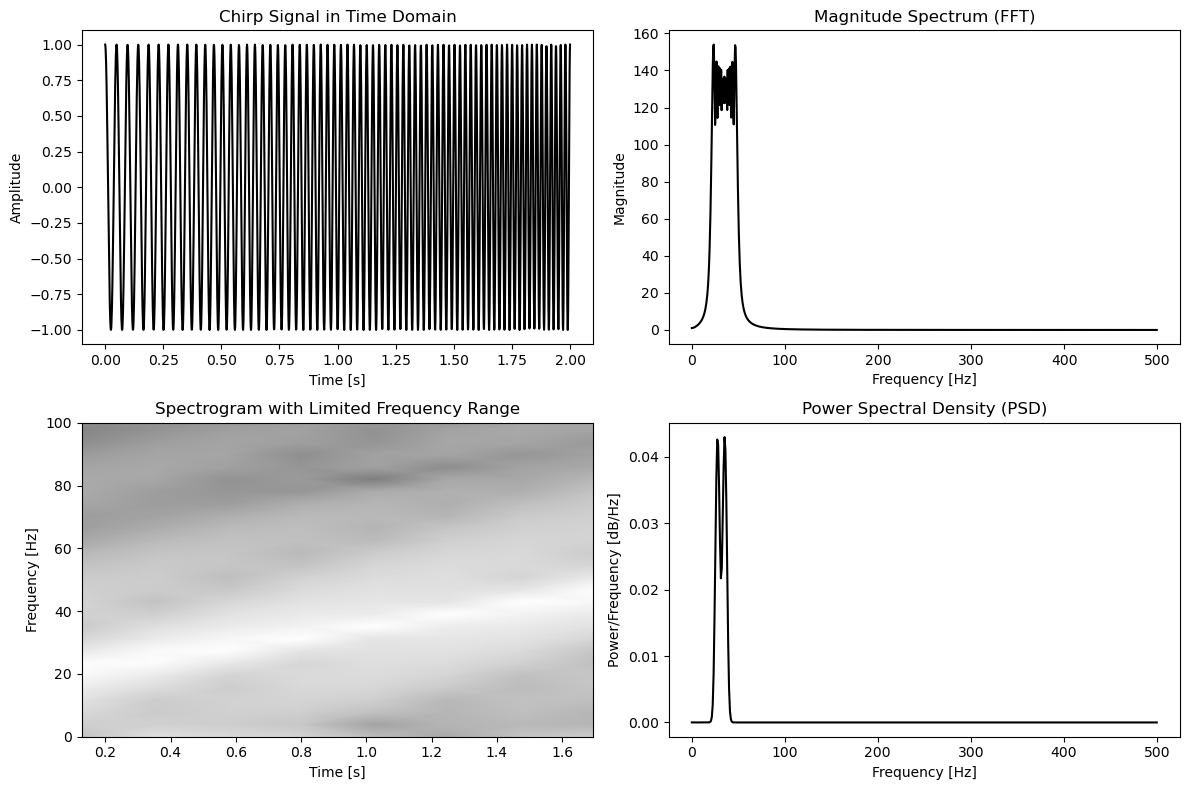

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, spectrogram, welch

# Sampling parameters
fs = 1000  # Sampling frequency in Hz
duration = 2  # Duration of the signal in seconds
t = np.linspace(0, duration, int(fs * duration))  # Time vector

# Chirp signal parameters
f_start = 20  # Start frequency of the chirp in Hz
f_end = 50  # End frequency of the chirp in Hz

# Generate the chirp signal
chirp_signal = chirp(t, f0=f_start, f1=f_end, t1=duration, method='linear')

# Compute the FFT (Frequency Spectrum)
fft_signal = np.fft.fft(chirp_signal)
fft_freq = np.fft.fftfreq(len(t), d=1/fs)

# Compute the Power Spectral Density (PSD) using Welch's method
frequencies, psd = welch(chirp_signal, fs, nperseg=1024)

# Plotting the results in black and white
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Time-domain representation of the chirp signal
axs[0, 0].plot(t, chirp_signal, color='black')
axs[0, 0].set_title('Chirp Signal in Time Domain')
axs[0, 0].set_xlabel('Time [s]')
axs[0, 0].set_ylabel('Amplitude')

# Magnitude Spectrum (FFT result)
axs[0, 1].plot(fft_freq[:len(fft_freq)//2], np.abs(fft_signal)[:len(fft_signal)//2], color='black')
axs[0, 1].set_title('Magnitude Spectrum (FFT)')
axs[0, 1].set_xlabel('Frequency [Hz]')
axs[0, 1].set_ylabel('Magnitude')

# Spectrogram with a limited frequency range
f, t_spec, Sxx = spectrogram(chirp_signal, fs)
axs[1, 0].pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='gouraud', cmap='gray')
axs[1, 0].set_ylim([0, 100])  # Focus on the 0-100 Hz range for clarity
axs[1, 0].set_title('Spectrogram with Limited Frequency Range')
axs[1, 0].set_xlabel('Time [s]')
axs[1, 0].set_ylabel('Frequency [Hz]')

# Power Spectral Density (PSD) plot
axs[1, 1].plot(frequencies, psd, color='black')
axs[1, 1].set_title('Power Spectral Density (PSD)')
axs[1, 1].set_xlabel('Frequency [Hz]')
axs[1, 1].set_ylabel('Power/Frequency [dB/Hz]')

# Adjust the layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from pydub import AudioSegment

# Parameters for the audio signal
sample_rate = 44100  # Sampling rate in Hz
duration = 2  # Duration in seconds
frequency = 440  # Frequency of the sine wave (A4 note)

# Generate time vector
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate a sine wave
sine_wave = 0.5 * np.sin(2 * np.pi * frequency * t)

# Normalize to 16-bit PCM
audio_data = np.int16(sine_wave * 32767)

# Save the generated sine wave as a WAV file
write("original_sine_wave.wav", sample_rate, audio_data)

# Load the original sine wave using pydub
original_audio = AudioSegment.from_file("original_sine_wave.wav", format="wav")

# Save the original sine wave as a low-bitrate MP3 (simulating SBC compression)
compressed_audio_file = "compressed_sine_wave.mp3"
original_audio.export(compressed_audio_file, format="mp3", bitrate="32k")

# Reload the compressed audio
compressed_audio = AudioSegment.from_file(compressed_audio_file, format="mp3")
compressed_data = np.array(compressed_audio.get_array_of_samples())

# If stereo, select one channel
if len(compressed_audio.split_to_mono()) > 1:
    compressed_data = compressed_data[::2]
    audio_data = audio_data[::2]

# Plot the original and compressed audio waveforms
plt.figure(figsize=(15, 6))

# Original Audio
plt.subplot(2, 1, 1)
plt.plot(audio_data, color='blue')
plt.title('Original Sine Wave Audio Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')

# Compressed Audio
plt.subplot(2, 1, 2)
plt.plot(compressed_data, color='red')
plt.title('Compressed Audio Signal (Simulating SBC Compression)')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


CouldntDecodeError: Decoding failed. ffmpeg returned error code: 3199971767

Output from ffmpeg/avlib:

ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with clang version 18.1.6
  configuration: --prefix=/d/bld/ffmpeg_1716729588356/_h_env/Library --cc=clang.exe --cxx=clang++.exe --nm=llvm-nm --ar=llvm-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --ld=lld-link --target-os=win64 --enable-cross-compile --toolchain=msvc --host-cc=clang.exe --extra-libs=ucrt.lib --extra-libs=vcruntime.lib --extra-libs=oldnames.lib --strip=llvm-strip --disable-stripping --host-extralibs= --disable-libopenvino --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libopus --pkg-config=/d/bld/ffmpeg_1716729588356/_build_env/Library/bin/pkg-config
  libavutil      59.  8.100 / 59.  8.100
  libavcodec     61.  3.100 / 61.  3.100
  libavformat    61.  1.100 / 61.  1.100
  libavdevice    61.  1.100 / 61.  1.100
  libavfilter    10.  1.100 / 10.  1.100
  libswscale      8.  1.100 /  8.  1.100
  libswresample   5.  1.100 /  5.  1.100
  libpostproc    58.  1.100 / 58.  1.100
[mp3 @ 000002EAF3CE1BC0] Failed to find two consecutive MPEG audio frames.
[in#0 @ 000002EAF3CB81C0] Error opening input: Invalid data found when processing input
Error opening input file compressed_sine_wave.mp3.
Error opening input files: Invalid data found when processing input


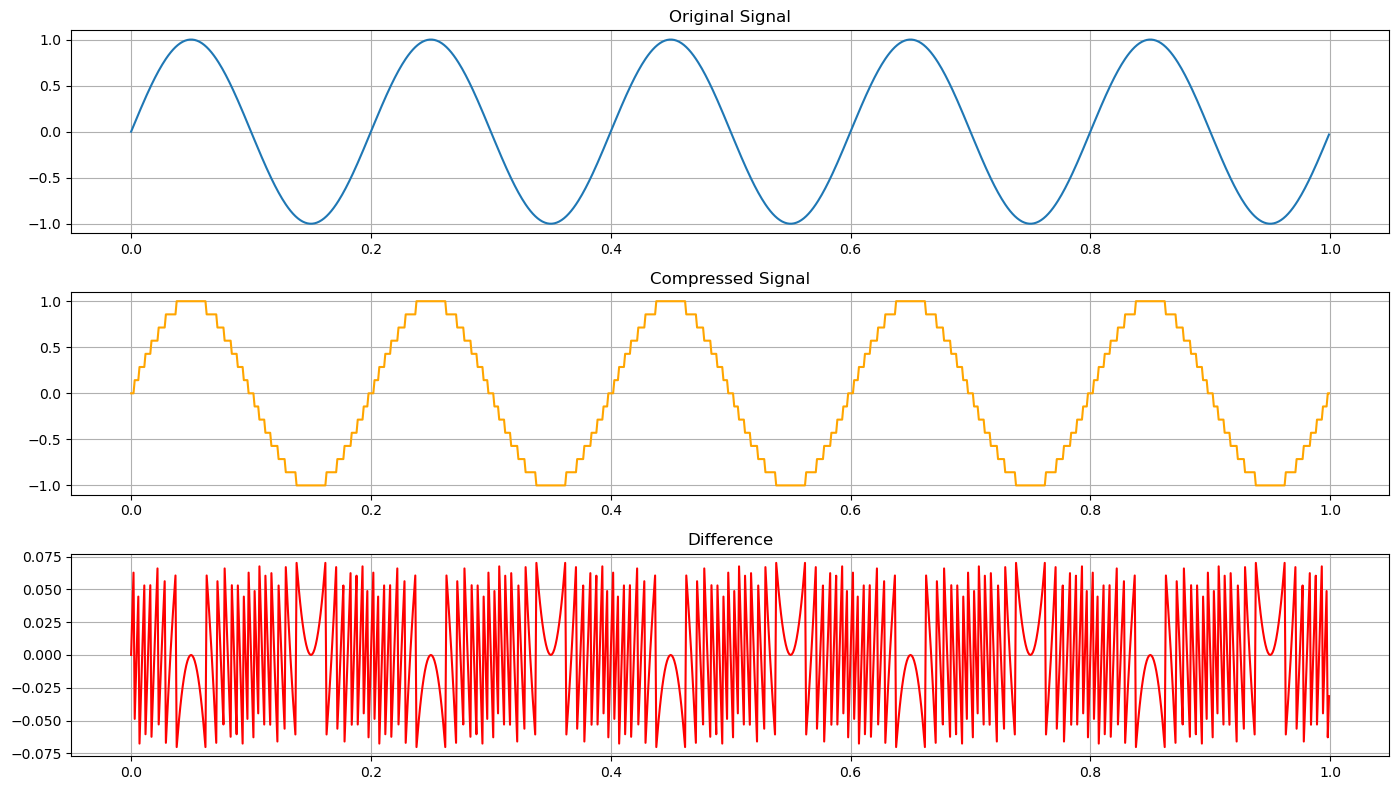

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成原始音频信号（正弦波）
fs = 1000  # 采样率
t = np.linspace(0, 1, fs, endpoint=False)  # 时间序列
freq = 5  # 信号频率
original_signal = np.sin(2 * np.pi * freq * t)

# 模拟压缩过程：降低比特率/量化
def compress_signal(signal, num_bits):
    max_val = np.max(np.abs(signal))
    quantized_signal = np.round(signal / max_val * (2**(num_bits - 1) - 1))
    compressed_signal = quantized_signal / (2**(num_bits - 1) - 1) * max_val
    return compressed_signal

compressed_signal = compress_signal(original_signal, 4)  # 模拟4位量化

# 计算差异
difference = original_signal - compressed_signal

# 可视化
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(t, original_signal, label="Original Signal")
plt.title("Original Signal")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, compressed_signal, label="Compressed Signal", color='orange')
plt.title("Compressed Signal")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, difference, label="Difference (Original - Compressed)", color='red')
plt.title("Difference")
plt.grid(True)

plt.tight_layout()
plt.show()


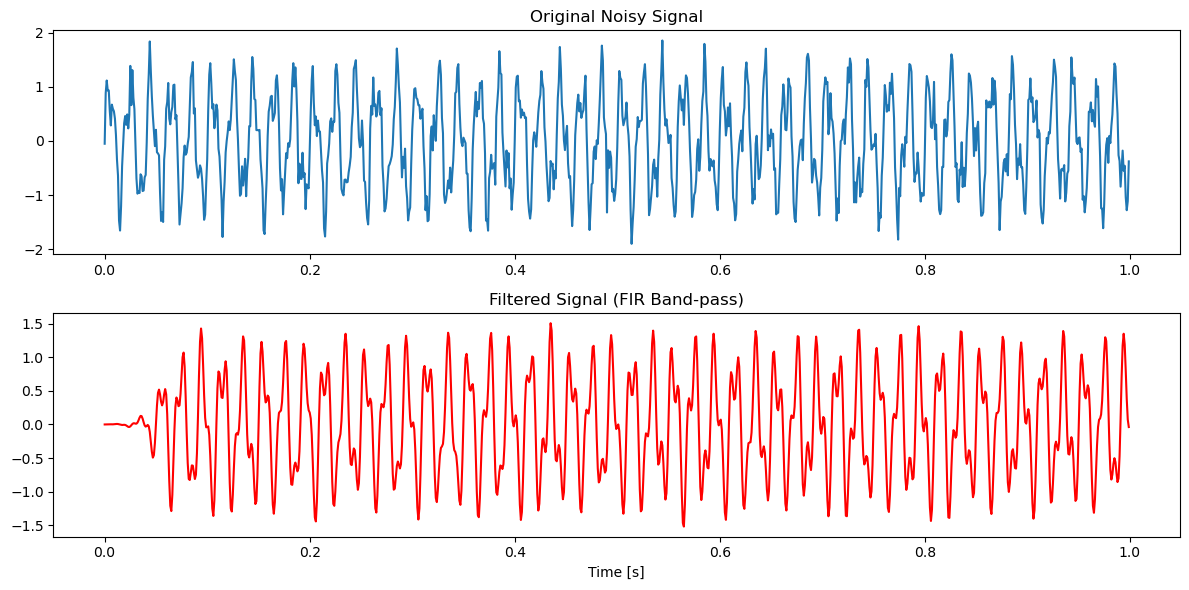

In [6]:
import numpy as np
from scipy.signal import firwin, lfilter
import matplotlib.pyplot as plt

# 示例参数
fs = 1000  # 采样率
t = np.arange(0, 1.0, 1.0/fs)

# 生成带有噪声的示例信号
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)
signal += 0.2 * np.random.randn(len(t))  # 加入噪声

# 设计FIR带通滤波器
numtaps = 101  # 滤波器的阶数
lowcut = 40.0  # 下截止频率
highcut = 130.0  # 上截止频率

fir_coeff = firwin(numtaps, [lowcut, highcut], pass_zero=False, fs=fs)

# 应用FIR滤波器
filtered_signal = lfilter(fir_coeff, 1.0, signal)

# 可视化原始信号和滤波后信号
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Noisy signal')
plt.title('Original Noisy Signal')
plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Filtered signal (FIR)', color='red')
plt.title('Filtered Signal (FIR Band-pass)')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.show()


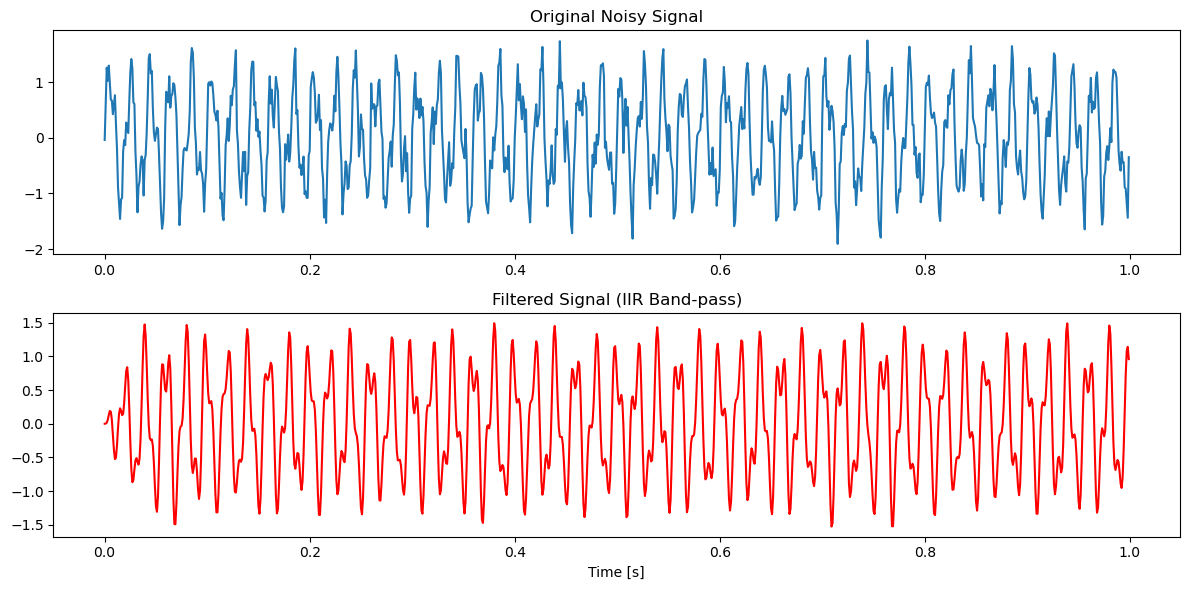

In [4]:
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

# 示例参数
fs = 1000  # 采样率
t = np.arange(0, 1.0, 1.0/fs)

# 生成带有噪声的示例信号
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)
signal += 0.2 * np.random.randn(len(t))  # 加入噪声

# 设计IIR带通滤波器
lowcut = 40.0  # 下截止频率
highcut = 130.0  # 上截止频率
order = 4  # 滤波器的阶数

b, a = butter(order, [lowcut, highcut], btype='band', fs=fs)

# 应用IIR滤波器
filtered_signal = lfilter(b, a, signal)

# 可视化原始信号和滤波后信号
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Noisy signal')
plt.title('Original Noisy Signal')
plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Filtered signal (IIR)', color='red')
plt.title('Filtered Signal (IIR Band-pass)')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.show()


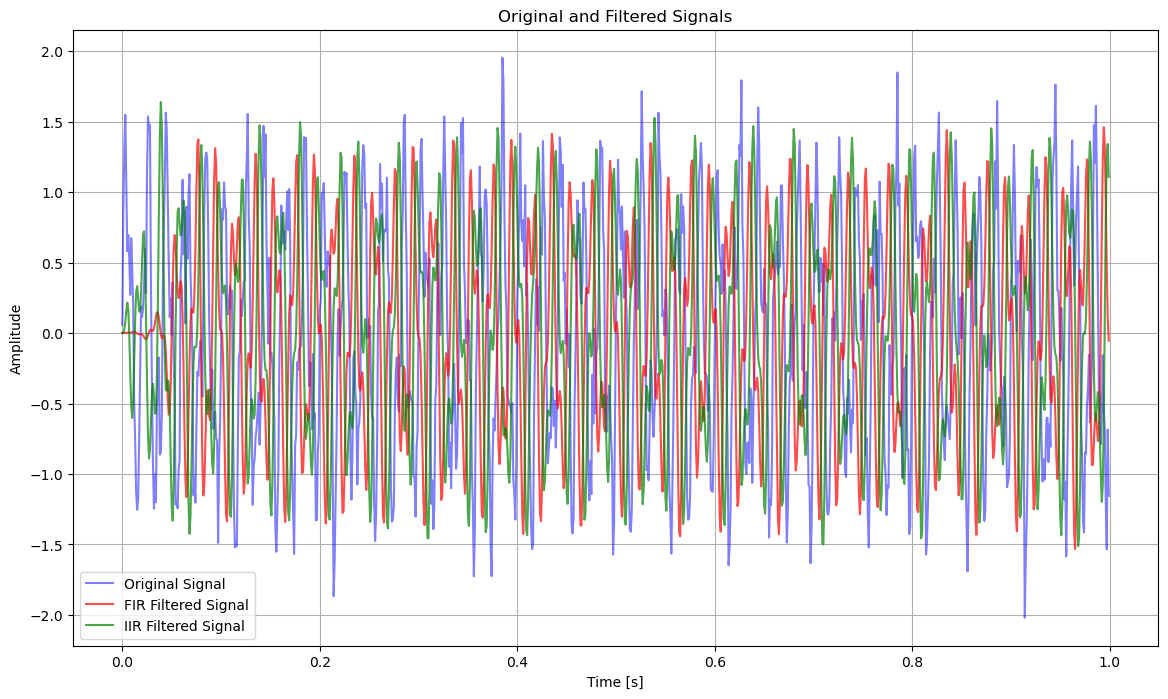

In [9]:
import numpy as np
from scipy.signal import firwin, butter, lfilter
import matplotlib.pyplot as plt

# 示例参数
fs = 1000  # 采样率
t = np.arange(0, 1.0, 1.0/fs)

# 生成带有噪声的示例信号
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)
signal += 0.2 * np.random.randn(len(t))  # 加入噪声

# 设计FIR带通滤波器
numtaps = 101  # FIR滤波器的阶数
lowcut = 40.0  # 下截止频率
highcut = 130.0  # 上截止频率

fir_coeff = firwin(numtaps, [lowcut, highcut], pass_zero=False, fs=fs)

# 设计IIR带通滤波器
order = 4  # IIR滤波器的阶数
b, a = butter(order, [lowcut, highcut], btype='band', fs=fs)

# 应用FIR滤波器
fir_filtered_signal = lfilter(fir_coeff, 1.0, signal)

# 应用IIR滤波器
iir_filtered_signal = lfilter(b, a, signal)

# 可视化原始信号和滤波后的信号
plt.figure(figsize=(14, 8))
plt.plot(t, signal, label='Original Signal', color='blue', alpha=0.5)
plt.plot(t, fir_filtered_signal, label='FIR Filtered Signal', color='red', alpha=0.7)
plt.plot(t, iir_filtered_signal, label='IIR Filtered Signal', color='green', alpha=0.7)

plt.title('Original and Filtered Signals')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


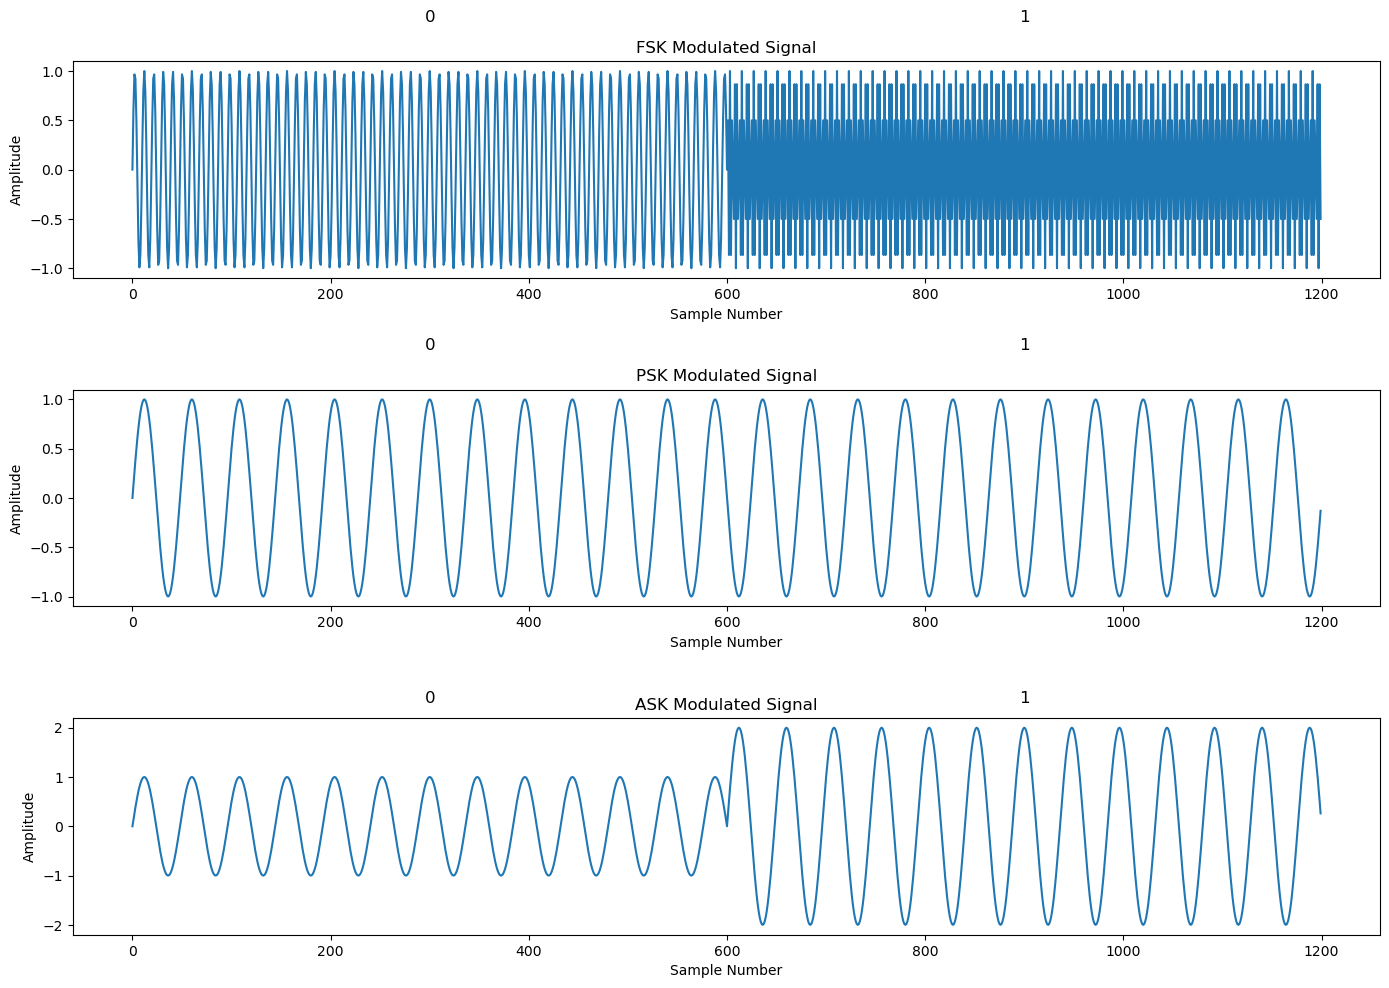

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 基本参数设置
fs = 4800  # 采样率
t = np.arange(0, 1.0, 1.0/fs)  # 时间向量
f0 = 500  # 低频，代表二进制0
f1 = 2000  # 高频，代表二进制1
fc = 100  # 载波频率，用于PSK和ASK
data = np.array([0, 1])  # 要调制的二进制数据
bit_duration = 0.125  # 每个位元的持续时间（秒）

# 生成FSK调制信号
fsk_signal = np.array([])
for bit in data:
    f = f0 if bit == 0 else f1
    t_bit = np.arange(0, bit_duration, 1.0/fs)
    fsk_signal = np.concatenate([fsk_signal, np.sin(2 * np.pi * f * t_bit)])

# 生成PSK调制信号
psk_signal = np.array([])
for bit in data:
    phase = 0 if bit == 0 else np.pi
    t_bit = np.arange(0, bit_duration, 1.0/fs)
    psk_signal = np.concatenate([psk_signal, np.sin(2 * np.pi * fc * t_bit + phase)])

# 生成ASK调制信号
ask_signal = np.array([])
for bit in data:
    amplitude = 1 if bit == 0 else 2
    t_bit = np.arange(0, bit_duration, 1.0/fs)
    ask_signal = np.concatenate([ask_signal, amplitude * np.sin(2 * np.pi * fc * t_bit)])

# 画图
plt.figure(figsize=(14, 10))

# FSK信号
plt.subplot(3, 1, 1)
plt.plot(fsk_signal)
plt.title('FSK Modulated Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
for i, bit in enumerate(data):
    plt.text(i * bit_duration * fs + (bit_duration * fs) / 2, 1.5, str(bit), fontsize=12, ha='center')
    
# PSK信号
plt.subplot(3, 1, 2)
plt.plot(psk_signal)
plt.title('PSK Modulated Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
for i, bit in enumerate(data):
    plt.text(i * bit_duration * fs + (bit_duration * fs) / 2, 1.5, str(bit), fontsize=12, ha='center')

# ASK信号
plt.subplot(3, 1, 3)
plt.plot(ask_signal)
plt.title('ASK Modulated Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
for i, bit in enumerate(data):
    plt.text(i * bit_duration * fs + (bit_duration * fs) / 2, 2.5, str(bit), fontsize=12, ha='center')

plt.tight_layout()
plt.show()


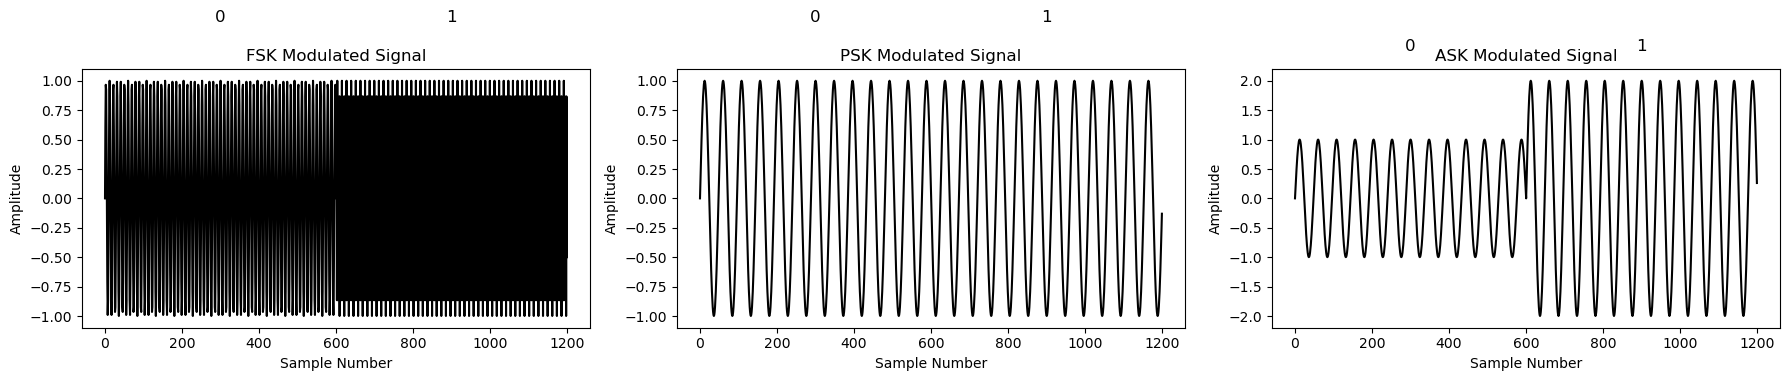

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 基本参数设置
fs = 4800  # 采样率
t = np.arange(0, 1.0, 1.0/fs)  # 时间向量
f0 = 500  # 低频，代表二进制0
f1 = 2000  # 高频，代表二进制1
fc = 100  # 载波频率，用于PSK和ASK
data = np.array([0, 1])  # 要调制的二进制数据
bit_duration = 0.125  # 每个位元的持续时间（秒）

# 生成FSK调制信号
fsk_signal = np.array([])
for bit in data:
    f = f0 if bit == 0 else f1
    t_bit = np.arange(0, bit_duration, 1.0/fs)
    fsk_signal = np.concatenate([fsk_signal, np.sin(2 * np.pi * f * t_bit)])

# 生成PSK调制信号
psk_signal = np.array([])
for bit in data:
    phase = 0 if bit == 0 else np.pi
    t_bit = np.arange(0, bit_duration, 1.0/fs)
    psk_signal = np.concatenate([psk_signal, np.sin(2 * np.pi * fc * t_bit + phase)])

# 生成ASK调制信号
ask_signal = np.array([])
for bit in data:
    amplitude = 1 if bit == 0 else 2
    t_bit = np.arange(0, bit_duration, 1.0/fs)
    ask_signal = np.concatenate([ask_signal, amplitude * np.sin(2 * np.pi * fc * t_bit)])

# 画图
plt.figure(figsize=(18, 4))

# FSK信号
plt.subplot(1, 3, 1)
plt.plot(fsk_signal, color='black')
plt.title('FSK Modulated Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
for i, bit in enumerate(data):
    plt.text(i * bit_duration * fs + (bit_duration * fs) / 2, 1.5, str(bit), fontsize=12, ha='center')
    
# PSK信号
plt.subplot(1, 3, 2)
plt.plot(psk_signal, color='black')
plt.title('PSK Modulated Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
for i, bit in enumerate(data):
    plt.text(i * bit_duration * fs + (bit_duration * fs) / 2, 1.5, str(bit), fontsize=12, ha='center')

# ASK信号
plt.subplot(1, 3, 3)
plt.plot(ask_signal, color='black')
plt.title('ASK Modulated Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
for i, bit in enumerate(data):
    plt.text(i * bit_duration * fs + (bit_duration * fs) / 2, 2.5, str(bit), fontsize=12, ha='center')

plt.tight_layout()
plt.show()


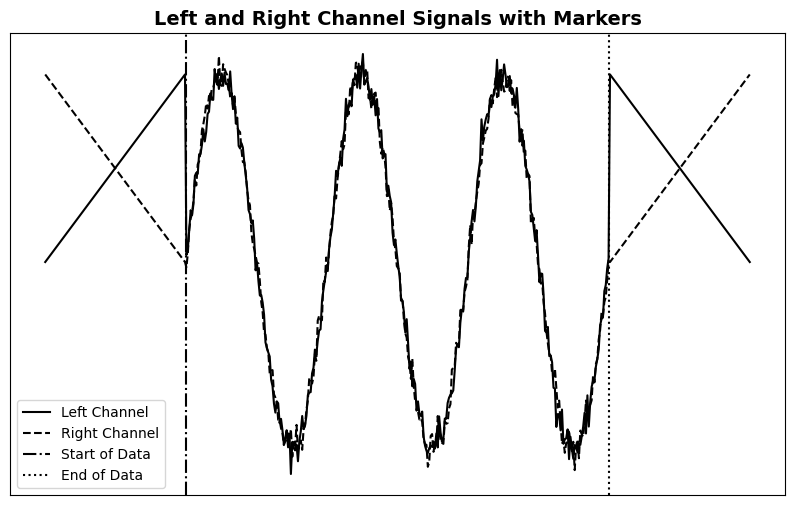

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 定义时间轴
time = np.linspace(0, 1, 500)  # 假设500个时间点

# Starting marker
left_channel_start = np.linspace(0, 1, len(time[:100]))  # 左声道线性增加
right_channel_start = np.linspace(1, 0, len(time[:100]))  # 右声道线性递减

# Data section (生成随机wave)
np.random.seed(42)  # 固定随机种子以便重现结果
left_channel_data = np.sin(2 * np.pi * 5 * time[100:400]) + 0.05 * np.random.randn(len(time[100:400]))
right_channel_data = np.sin(2 * np.pi * 5 * time[100:400]) + 0.05 * np.random.randn(len(time[100:400]))

# Ending marker
left_channel_end = np.linspace(1, 0, len(time[400:]))  # 左声道线性递减
right_channel_end = np.linspace(0, 1, len(time[400:]))  # 右声道线性增加

# 合并各部分数据
left_channel = np.concatenate((left_channel_start, left_channel_data, left_channel_end))
right_channel = np.concatenate((right_channel_start, right_channel_data, right_channel_end))

# 绘制图像
plt.figure(figsize=(10, 6))
plt.plot(time, left_channel, label='Left Channel', color='black', linestyle='-')  # 黑色实线
plt.plot(time, right_channel, label='Right Channel', color='black', linestyle='--')  # 黑色虚线
plt.axvline(x=0.2, color='black', linestyle='-.', label='Start of Data')  # 黑色点划线
plt.axvline(x=0.8, color='black', linestyle=':', label='End of Data')  # 黑色点线

# 隐藏坐标轴刻度
plt.xticks([])
plt.yticks([])

plt.title('Left and Right Channel Signals with Markers', fontsize=14, fontweight='bold')
plt.legend()
plt.show()


In [22]:
import wave
import numpy as np

def generate_silent_audio(filename, duration, framerate=44100):
    """
    生成一个指定时长的无声音频文件。

    :param filename: 保存的音频文件名
    :param duration: 音频时长（秒）
    :param framerate: 采样率，默认为44100Hz
    """
    # 计算样本数
    num_samples = int(duration * framerate)
    
    # 生成全为零的样本数据（表示静音）
    silent_samples = np.zeros(num_samples, dtype=np.int16)
    
    # 创建WAV文件
    with wave.open(filename, 'w') as wf:
        # 设置音频参数: 声道数, 样本宽度（字节）, 采样率, 样本总数, 压缩类型, 压缩描述
        wf.setnchannels(1)  # 单声道
        wf.setsampwidth(2)  # 每个样本占2字节（16位）
        wf.setframerate(framerate)
        
        # 将静音样本写入文件
        wf.writeframes(silent_samples.tobytes())

# 使用示例：生成一个2秒的静音音频文件
generate_silent_audio('silent_audio.wav', duration=3)

print("Silent audio file generated successfully.")


Silent audio file generated successfully.


In [3]:
import numpy as np
import scipy.io.wavfile as wavfile


duration = 5 
frequency = 20000  
sampling_rate = 44100 


t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)


sine_wave = 0.5 * np.sin(2 * np.pi * frequency * t) 


audio_data = np.int16(sine_wave * 32767)


wavfile.write('high_freq_sine.wav', sampling_rate, audio_data)

print("WAV file generated: high_freq_sine.wav")


WAV file generated: high_freq_sine.wav


In [10]:
from pydub import AudioSegment

def extract_segment(input_file, start_time, duration, output_file):
    # 加载音频文件
    audio = AudioSegment.from_mp3(input_file)
    
    # 计算起始和结束时间（毫秒）
    start_time_ms = start_time * 1000
    end_time_ms = start_time_ms + (duration * 1000)
    
    # 提取指定时间段的音频
    segment = audio[start_time_ms:end_time_ms]
    
    # 导出提取的音频片段
    segment.export(output_file, format="mp3")
    print(f"Extracted segment saved as: {output_file}")

# 使用示例
input_file = "sound1-a.mp3"  # 输入音频文件路径
start_time = 10  # 提取片段的起始时间（秒）
duration = 10  # 提取片段的时长（秒）
output_file = "sound_10.mp3"  # 输出音频文件路径

extract_segment(input_file, start_time, duration, output_file)


Extracted segment saved as: sound_10.mp3
